<a href="https://colab.research.google.com/github/iam-fern/Generate_addition_2X/blob/main/GQtest_data(y_hat)_add_delta_(_2_8)_n60_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition_2X/addition_delta_-2.8'

In [4]:
os.listdir(base_path)

['data_add_delta_-2.8_n20.csv',
 'data_add_delta_-2.8_n30.csv',
 'data_add_delta_-2.8_n60.csv',
 'data_add_delta_-2.8_n120.csv',
 'data_add_delta_-2.8_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_-2.8_n60.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,22.895035,72.541654,0.002499,105.439188,105.437628,0.001560
1,0.0,1.0,92.553164,51.257138,-0.002899,153.807403,153.809615,-0.002212
2,0.0,2.0,95.082704,34.184935,-0.000444,139.267195,139.266877,0.000318
3,0.0,3.0,29.792581,34.600114,0.002722,74.395416,74.393437,0.001979
4,0.0,4.0,80.983758,60.607772,-0.007621,151.583909,151.591120,-0.007211
...,...,...,...,...,...,...,...,...
59995,999.0,55.0,72.458404,34.893371,0.005048,117.356823,117.349763,0.007061
59996,999.0,56.0,36.180718,33.282432,0.002153,79.465303,79.460245,0.005058
59997,999.0,57.0,79.325307,76.752031,0.001883,166.079221,166.078110,0.001111
59998,999.0,58.0,58.768934,61.813563,0.000721,130.583218,130.581880,0.001337


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,22.895035,72.541654,0.002499,105.439188,105.437628,0.001560
1,0.0,1.0,92.553164,51.257138,-0.002899,153.807403,153.809615,-0.002212
2,0.0,2.0,95.082704,34.184935,-0.000444,139.267195,139.266877,0.000318
3,0.0,3.0,29.792581,34.600114,0.002722,74.395416,74.393437,0.001979
4,0.0,4.0,80.983758,60.607772,-0.007621,151.583909,151.591120,-0.007211
...,...,...,...,...,...,...,...,...
59995,999.0,55.0,72.458404,34.893371,0.005048,117.356823,117.349763,0.007061
59996,999.0,56.0,36.180718,33.282432,0.002153,79.465303,79.460245,0.005058
59997,999.0,57.0,79.325307,76.752031,0.001883,166.079221,166.078110,0.001111
59998,999.0,58.0,58.768934,61.813563,0.000721,130.583218,130.581880,0.001337


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    22.895035  72.541654  0.002499  105.439188  105.437628  0.001560
      1.0    92.553164  51.257138 -0.002899  153.807403  153.809615 -0.002212
      2.0    95.082704  34.184935 -0.000444  139.267195  139.266877  0.000318
      3.0    29.792581  34.600114  0.002722   74.395416   74.393437  0.001979
      4.0    80.983758  60.607772 -0.007621  151.583909  151.591120 -0.007211
...                ...        ...       ...         ...         ...       ...
999.0 55.0   72.458404  34.893371  0.005048  117.356823  117.349763  0.007061
      56.0   36.180718  33.282432  0.002153   79.465303   79.460245  0.005058
      57.0   79.325307  76.752031  0.001883  166.079221  166.078110  0.001111
      58.0   58.768934  61.813563  0.000721  130.583218  130.581880  0.001337
      59.0   78.176677  27.235702 -0.001742  115.410637  115.410009  0.000627

[60000 rows x 6 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    22.895035  72.541654  0.002499  105.439188  105.437628  0.001560
      1.0    92.553164  51.257138 -0.002899  153.807403  153.809615 -0.002212
      2.0    95.082704  34.184935 -0.000444  139.267195  139.266877  0.000318
      3.0    29.792581  34.600114  0.002722   74.395416   74.393437  0.001979
      4.0    80.983758  60.607772 -0.007621  151.583909  151.591120 -0.007211
...                ...        ...       ...         ...         ...       ...
999.0 55.0   72.458404  34.893371  0.005048  117.356823  117.349763  0.007061
      56.0   36.180718  33.282432  0.002153   79.465303   79.460245  0.005058
      57.0   79.325307  76.752031  0.001883  166.079221  166.078110  0.001111
      58.0   58.768934  61.813563  0.000721  130.583218  130.581880  0.001337
      59.0   78.176677  27.235702 -0.001742  115.410637  115.410009  0.000627

[60000 rows x 6 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,22.895035,72.541654,0.002499,105.439188,105.437628,0.001560
1,0.0,1.0,92.553164,51.257138,-0.002899,153.807403,153.809615,-0.002212
2,0.0,2.0,95.082704,34.184935,-0.000444,139.267195,139.266877,0.000318
3,0.0,3.0,29.792581,34.600114,0.002722,74.395416,74.393437,0.001979
4,0.0,4.0,80.983758,60.607772,-0.007621,151.583909,151.591120,-0.007211
...,...,...,...,...,...,...,...,...
59995,999.0,55.0,72.458404,34.893371,0.005048,117.356823,117.349763,0.007061
59996,999.0,56.0,36.180718,33.282432,0.002153,79.465303,79.460245,0.005058
59997,999.0,57.0,79.325307,76.752031,0.001883,166.079221,166.078110,0.001111
59998,999.0,58.0,58.768934,61.813563,0.000721,130.583218,130.581880,0.001337


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    22.895035  72.541654  0.002499  105.439188  105.437628  0.001560
      1.0    92.553164  51.257138 -0.002899  153.807403  153.809615 -0.002212
      2.0    95.082704  34.184935 -0.000444  139.267195  139.266877  0.000318
      3.0    29.792581  34.600114  0.002722   74.395416   74.393437  0.001979
      4.0    80.983758  60.607772 -0.007621  151.583909  151.591120 -0.007211
...                ...        ...       ...         ...         ...       ...
999.0 55.0   72.458404  34.893371  0.005048  117.356823  117.349763  0.007061
      56.0   36.180718  33.282432  0.002153   79.465303   79.460245  0.005058
      57.0   79.325307  76.752031  0.001883  166.079221  166.078110  0.001111
      58.0   58.768934  61.813563  0.000721  130.583218  130.581880  0.001337
      59.0   78.176677  27.235702 -0.001742  115.410637  115.410009  0.000627

[60000 rows x 6 columns]

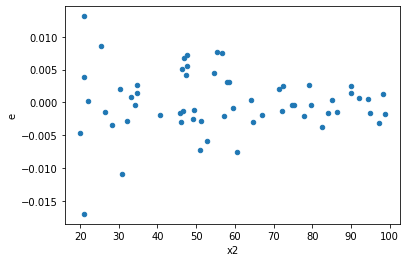

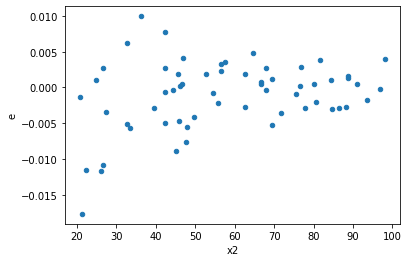

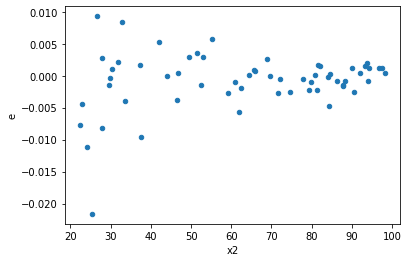

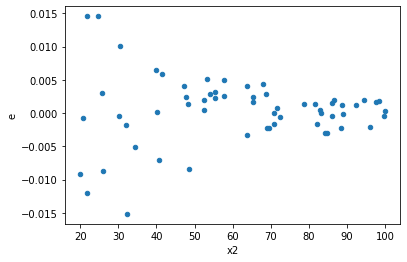

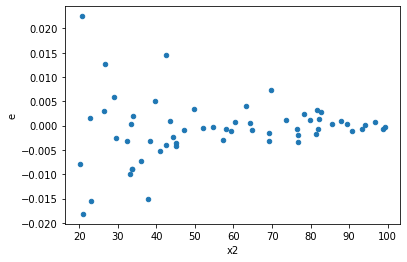

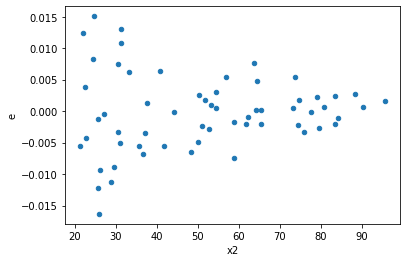

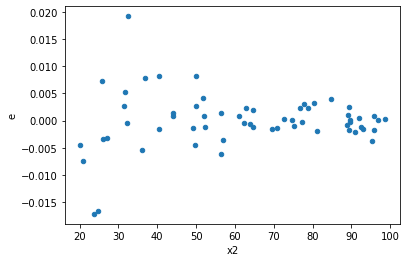

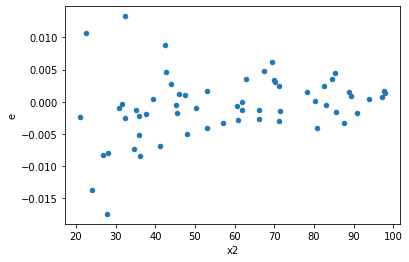

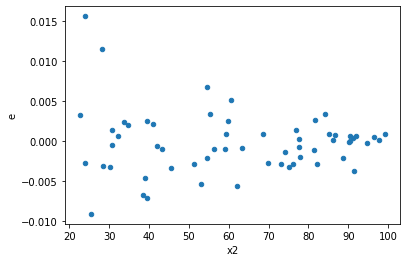

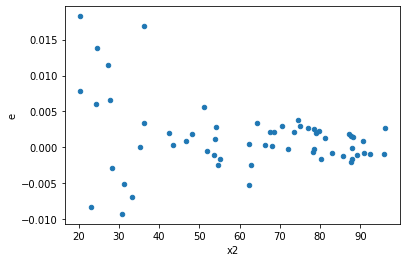

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
92.0,22.0,22.0,0.0004062947731131142,0.0004116188495234949,1.846794423241428e-05,1.8709947705613404e-05,1.013103974657578,0.9759179510699854,0.5120410244650073,0.4879589755349927,Reject005=1 : Homoscedasticity
103.0,22.0,22.0,0.00037323497654799797,0.00040976691194181595,1.696522620672718e-05,1.8625768724628e-05,1.097879185203105,0.8286107236891325,0.5856946381554338,0.41430536184456623,Reject005=1 : Homoscedasticity
230.0,22.0,22.0,0.0003108805657248504,0.00044173372323711254,1.4130934805675019e-05,2.0078805601686932e-05,1.4209113464753396,0.4165012200159304,0.7917493899920348,0.2082506100079652,Reject005=1 : Homoscedasticity
418.0,22.0,22.0,0.00037553470886822737,0.0004300561700596495,1.7069759494010335e-05,1.954800772998407e-05,1.1451835473630039,0.7533554988478668,0.6233222505760666,0.3766777494239334,Reject005=1 : Homoscedasticity
536.0,22.0,22.0,0.00028633880472975025,0.0003127356226051276,1.3015400214988648e-05,1.4215255572960344e-05,1.092187357910818,0.8380116687619954,0.5809941656190023,0.4190058343809977,Reject005=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,22.0,22.0,0.0005759068501753432,0.00018822342093988075,2.6177584098879236e-05,8.555610042721852e-06,0.32682962684429506,0.011386663781356192,Reject005=0 : Heteroscedasticity
1.0,22.0,22.0,0.0006019991704873727,0.00018572940601518137,2.736359865851694e-05,8.44224572796279e-06,0.30852103311839557,0.007940365689891626,Reject005=0 : Heteroscedasticity
2.0,22.0,22.0,0.0008046179511328128,9.547273300947995e-05,3.657354323330967e-05,4.339669682249089e-06,0.11865598185457452,4.868450997641047e-06,Reject005=0 : Heteroscedasticity
3.0,22.0,22.0,0.0007898330034969773,0.00010887817943705766,3.5901500158953513e-05,4.949008156229893e-06,0.13784962005259424,1.8028747563005664e-05,Reject005=0 : Heteroscedasticity
4.0,22.0,22.0,0.001203773555190775,0.00028379473871752153,5.4716979781398865e-05,1.2899760850796434e-05,0.2357542558513387,0.0012765215872103351,Reject005=0 : Heteroscedasticity
5.0,22.0,22.0,0.0013093133338649855,0.00024724361173569516,5.951424244840843e-05,1.1238345987986143e-05,0.18883456338587212,0.00023978266098715188,Reject005=0 : Heteroscedasticity
6.0,22.0,22.0,0.0005260299197035558,7.214670682047492e-05,2.3910450895616176e-05,3.2793957645670417e-06,0.13715323809172905,1.7261659773242536e-05,Reject005=0 : Heteroscedasticity
7.0,22.0,22.0,0.0009075624766720013,0.0001758185127041163,4.125283984872733e-05,7.991750577459831e-06,0.19372607090239827,0.00029275746336533687,Reject005=0 : Heteroscedasticity
8.0,22.0,22.0,0.0005901696621531487,8.291745218884433e-05,2.682589373423403e-05,3.7689750994929243e-06,0.14049765263489147,2.121770986848154e-05,Reject005=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    916
Reject005=1 : Homoscedasticity       84
Name: Result_test, dtype: int64